In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/churn modelling.csv')

In [ ]:
df.drop(['CustomerId','Surname','RowNumber'],axis=1,inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [ ]:
df.describe(include='all')

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


In [ ]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

#Univariate Analysis

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


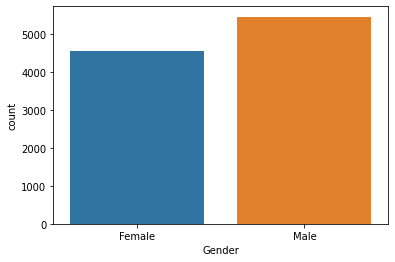

In [ ]:
sns.countplot(df['Gender'])

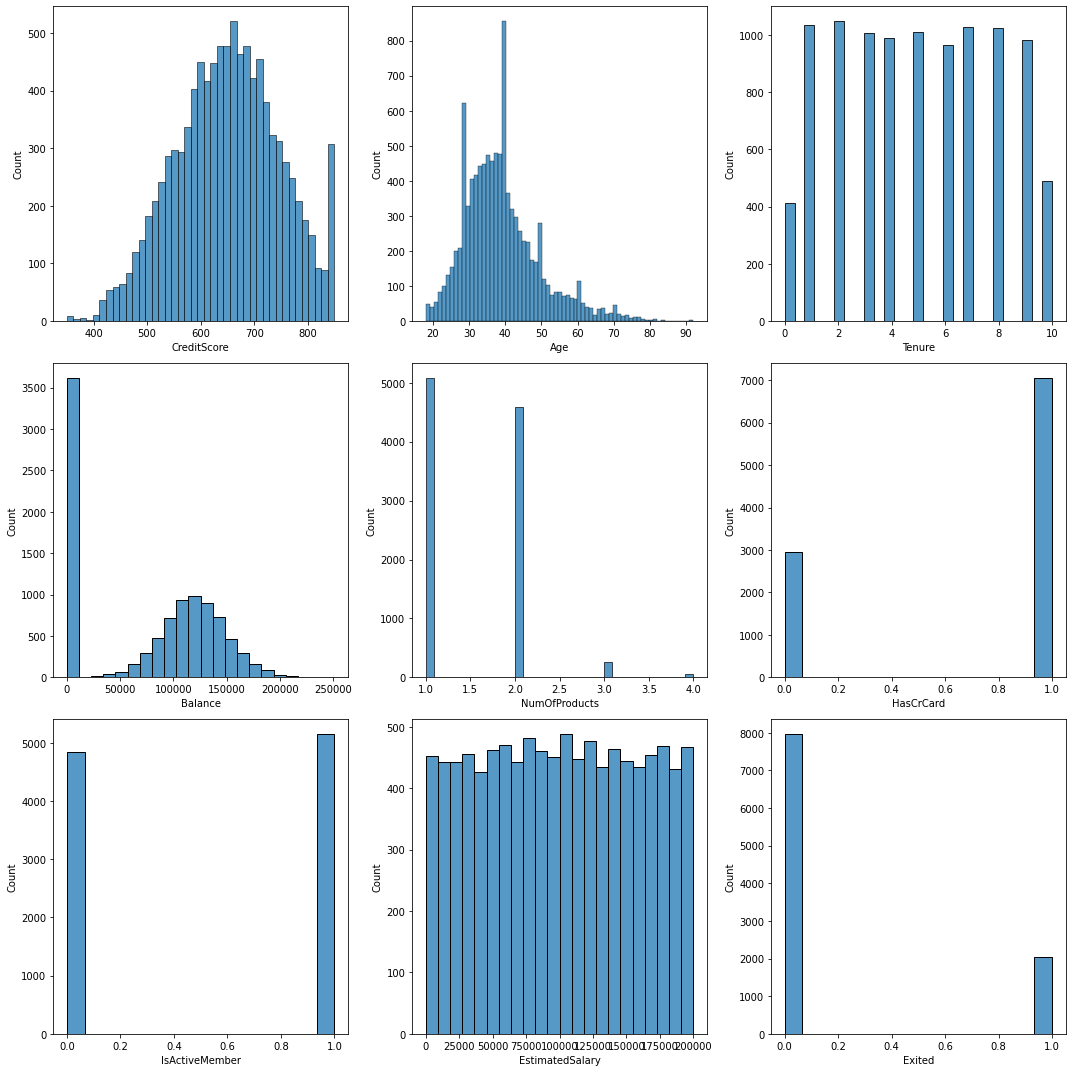

In [ ]:
cols = 3
rows = 3
num_cols = df.select_dtypes(exclude='object').columns
fig = plt.figure(figsize=(cols*5, rows*5))
for i, col in enumerate(num_cols):
    ax=fig.add_subplot(rows,cols,i+1)
    sns.histplot(x = df[col], ax = ax)
    
fig.tight_layout()  
plt.show()

#Bi-Variate Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


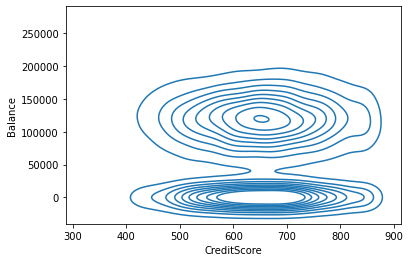

In [ ]:
sns.kdeplot(df.CreditScore,df.Balance)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


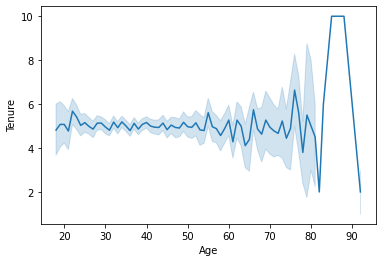

In [ ]:
sns.lineplot(df.Age,df.Tenure)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


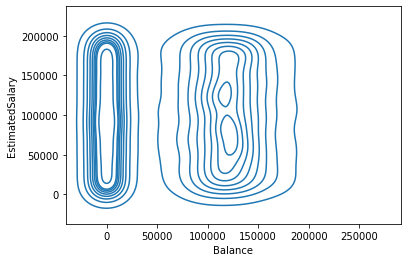

In [ ]:
sns.kdeplot(df.Balance,df.EstimatedSalary)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


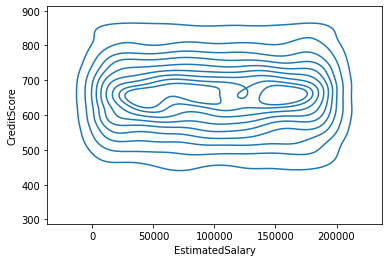

In [ ]:
sns.kdeplot(df.EstimatedSalary,df.CreditScore)

#Multi-Variate Analysis

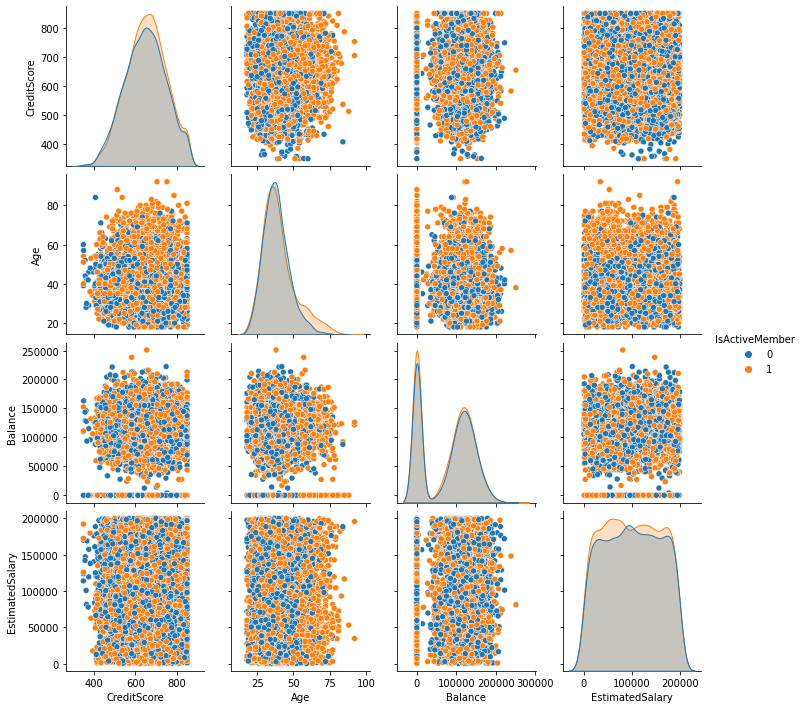

In [ ]:
sns.pairplot(data=df[['CreditScore','Age','Balance','EstimatedSalary','IsActiveMember']],hue='IsActiveMember')

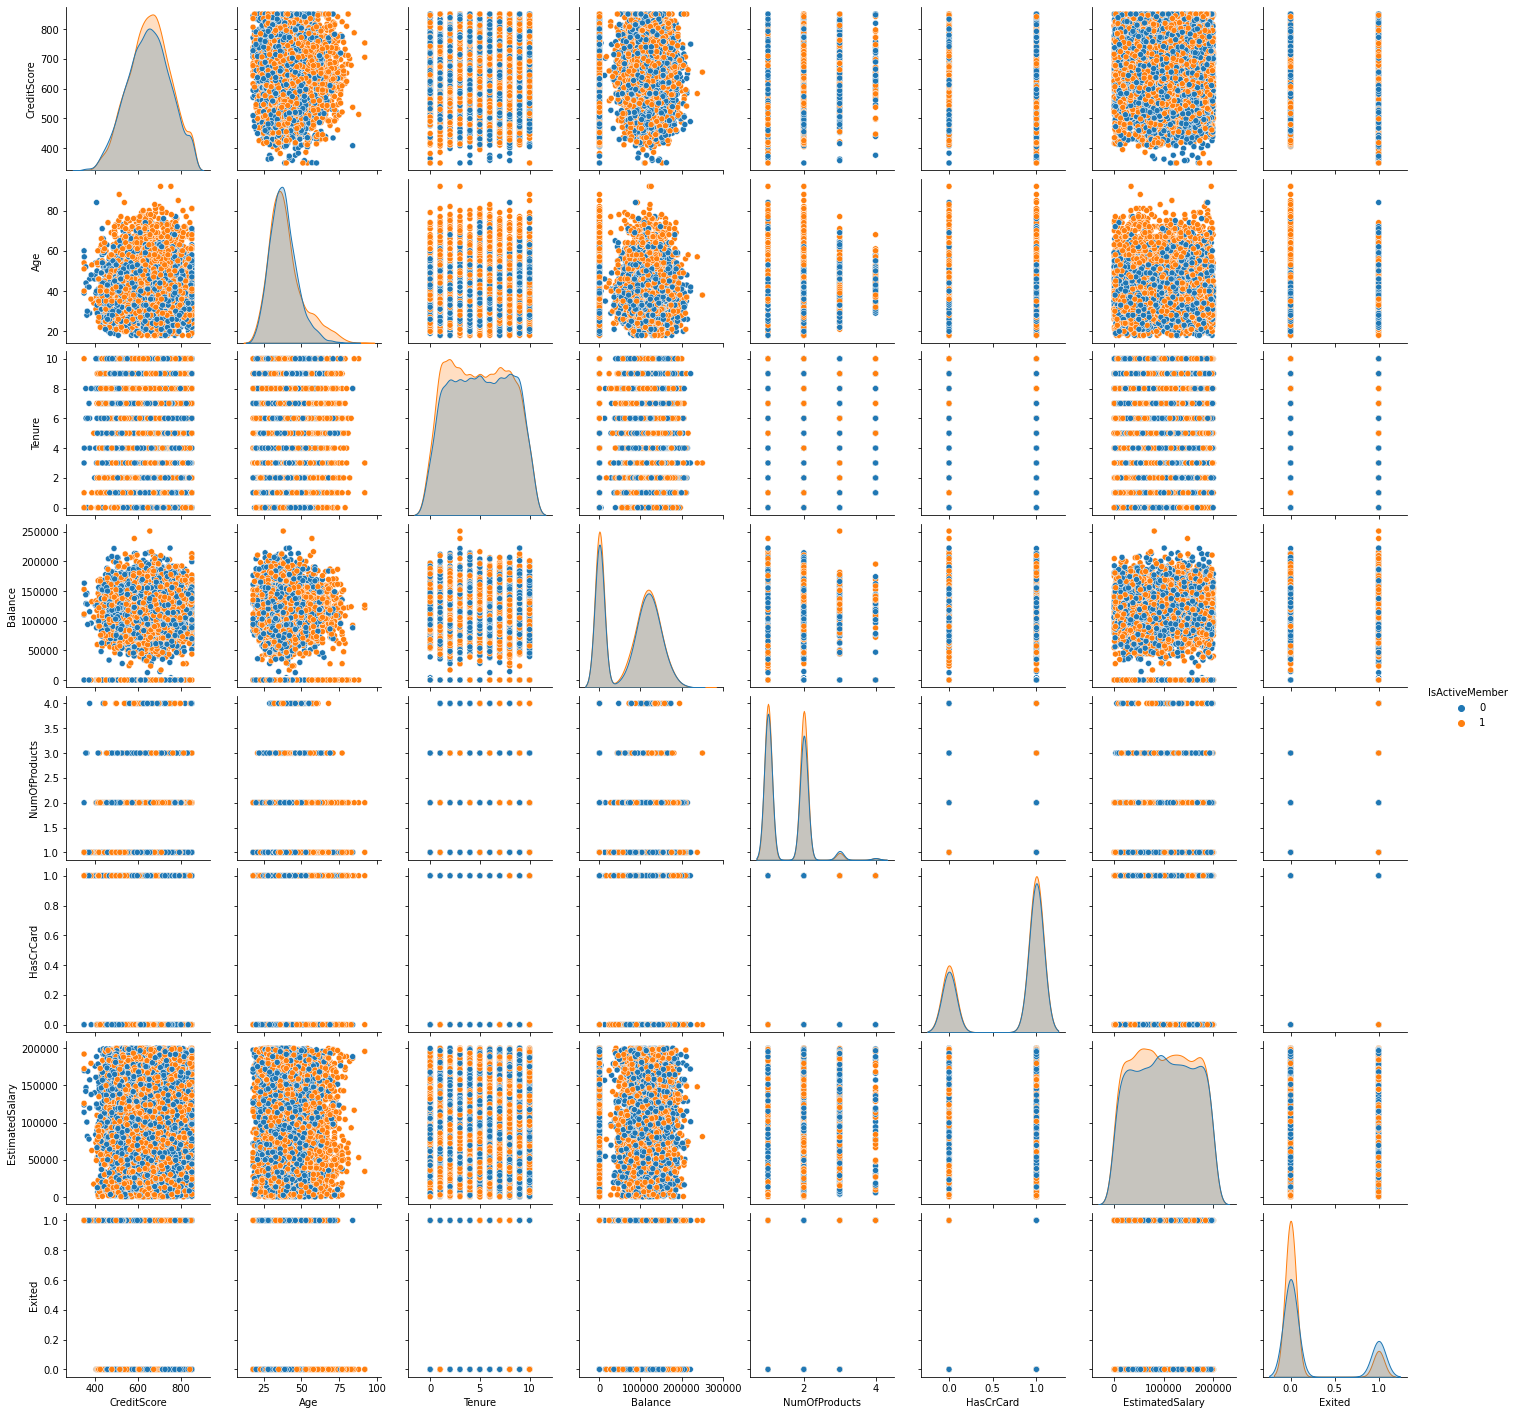

In [ ]:
sns.pairplot(data=df,hue='IsActiveMember')

#Descriptive Statistics

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [ ]:
df.shape

(10000, 11)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


In [ ]:
df.isna().any()

CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

#Handling Missing Values

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


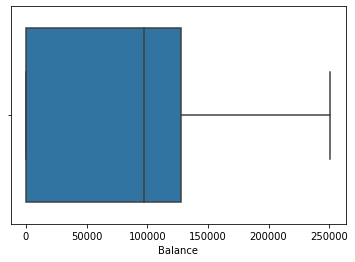

In [ ]:
sns.boxplot(df['Balance'])

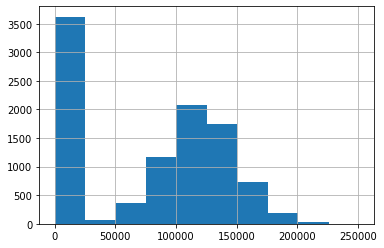

In [ ]:
df['Balance'].hist()

In [ ]:
index = df[(df['Balance'] == 0.0)].index
df.drop(index, inplace=True)

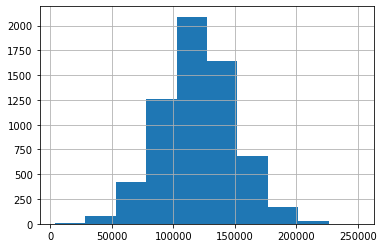

In [ ]:
df['Balance'].hist()

#Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
from collections import Counter as count

In [ ]:
le = LabelEncoder()

In [ ]:
df['Geography'].unique()

array(['Spain', 'France', 'Germany'], dtype=object)

In [ ]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
df['Geography']=le.fit_transform(df['Geography'])

In [ ]:
count(df['Geography'])

Counter({2: 1278, 0: 2596, 1: 2509})

In [ ]:
df['Gender']=le.fit_transform(df['Gender'])

In [ ]:
count(df['Gender'])

Counter({0: 2889, 1: 3494})

#Split the data into dependent and independent variables

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6383 entries, 1 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      6383 non-null   int64  
 1   Geography        6383 non-null   int64  
 2   Gender           6383 non-null   int64  
 3   Age              6383 non-null   int64  
 4   Tenure           6383 non-null   int64  
 5   Balance          6383 non-null   float64
 6   NumOfProducts    6383 non-null   int64  
 7   HasCrCard        6383 non-null   int64  
 8   IsActiveMember   6383 non-null   int64  
 9   EstimatedSalary  6383 non-null   float64
 10  Exited           6383 non-null   int64  
dtypes: float64(2), int64(9)
memory usage: 598.4 KB


In [ ]:
x=df.iloc[:,0:9]
y=df['EstimatedSalary']

In [ ]:
z=df['Exited']

In [ ]:
x.insert(9,'Exited',z)

In [ ]:
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
1,608,2,0,41,1,83807.86,1,0,1,0
2,502,0,0,42,8,159660.80,3,1,0,1
4,850,2,0,43,2,125510.82,1,1,1,0
5,645,2,1,44,8,113755.78,2,1,0,1
7,376,1,0,29,4,115046.74,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...
9991,597,0,0,53,4,88381.21,1,1,0,1
9993,644,0,1,28,7,155060.41,1,1,0,0
9996,516,0,1,35,10,57369.61,1,1,1,0
9998,772,1,1,42,3,75075.31,2,1,0,1


In [ ]:
y

1       112542.58
2       113931.57
4        79084.10
5       149756.71
7       119346.88
          ...    
9991     69384.71
9993     29179.52
9996    101699.77
9998     92888.52
9999     38190.78
Name: EstimatedSalary, Length: 6383, dtype: float64

#Split the data into training and testing

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=10)

#Scale the independent variables

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
st = StandardScaler()

In [ ]:
s_xtrain = st.fit_transform(xtrain)
s_xtrain

array([[ 1.6007569 ,  0.28265666, -1.09837141, ...,  0.66359706,
        -1.02584874, -0.55908268],
       [ 0.36711628, -1.05093358, -1.09837141, ..., -1.50693856,
         0.97480258, -0.55908268],
       [ 1.06168705,  1.6162469 ,  0.91043885, ..., -1.50693856,
         0.97480258, -0.55908268],
       ...,
       [ 0.71958503, -1.05093358, -1.09837141, ...,  0.66359706,
        -1.02584874,  1.78864421],
       [-1.44706111,  1.6162469 , -1.09837141, ...,  0.66359706,
         0.97480258, -0.55908268],
       [-0.7006567 , -1.05093358, -1.09837141, ...,  0.66359706,
         0.97480258, -0.55908268]])

In [ ]:
s_xtest = st.transform(xtest)
s_xtest

array([[ 0.64701793,  1.6162469 , -1.09837141, ...,  0.66359706,
         0.97480258, -0.55908268],
       [-0.19268703, -1.05093358, -1.09837141, ...,  0.66359706,
         0.97480258, -0.55908268],
       [-1.70622931,  1.6162469 ,  0.91043885, ...,  0.66359706,
         0.97480258, -0.55908268],
       ...,
       [-0.00608593, -1.05093358, -1.09837141, ...,  0.66359706,
         0.97480258, -0.55908268],
       [ 1.47635617, -1.05093358, -1.09837141, ...,  0.66359706,
        -1.02584874,  1.78864421],
       [ 1.89102528,  0.28265666, -1.09837141, ..., -1.50693856,
         0.97480258, -0.55908268]])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(10, activation='relu')) # Input
model.add(Dense(18, activation='relu')) # 1st hid. layer
model.add(Dense(9, activation='relu')) # 2nd hid. layer
model.add(Dense(8, activation='relu')) # 3rd hid. layer
model.add(Dense(1,activation='linear')) # output layer

In [ ]:
model.compile(optimizer='adam',loss='mse',metrics=['mse'])

In [ ]:
model.fit(xtrain,ytrain,batch_size=10,epochs=300)

Epoch 1/300
447/447 [==============================] - 4s 3ms/step - loss: 4235891200.0000 - mse: 4235891200.0000
Epoch 2/300
447/447 [==============================] - 1s 3ms/step - loss: 3840298752.0000 - mse: 3840298752.0000
Epoch 3/300
447/447 [==============================] - 1s 3ms/step - loss: 3849593344.0000 - mse: 3849593344.0000
Epoch 4/300
447/447 [==============================] - 1s 3ms/step - loss: 3849167360.0000 - mse: 3849167360.0000
Epoch 5/300
447/447 [==============================] - 1s 3ms/step - loss: 3831653888.0000 - mse: 3831653888.0000
Epoch 6/300
447/447 [==============================] - 1s 3ms/step - loss: 3842178304.0000 - mse: 3842178304.0000
Epoch 7/300
447/447 [==============================] - 1s 3ms/step - loss: 3834818560.0000 - mse: 3834818560.0000
Epoch 8/300
447/447 [==============================] - 1s 3ms/step - loss: 3824633088.0000 - mse: 3824633088.0000
Epoch 9/300
447/447 [==============================] - 1s 3ms/step - loss: 3815837184.00